In [11]:
# Import
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, Conv2D

import os
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

In [12]:
# Sigmoid function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

# Derivative of Sigmoid function used for backprop.
def sigmoid_derivative(x):
    return x * (1.0 - x)

# Constructor for the Neural Network
class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input = x
        self.neuron = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1) # N neurons connected to output
        self.y = y
        self.output = np.zeros(self.y.shape) # instantiating the output
    
    #  Method that performs the feed-forward sequence
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    
    # Method that performs the backprogagation algorithm
    def backprop(self):
        
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,
                            (2*(self.y - self.output)
                            * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,
                            (np.dot(2*(self.y - self.output)
                            * sigmoid_derivative(self.output),
                            self.weights2.T) * sigmoid_derivative(self.layer1)))
        
        # Updating the weights
        self.weights1 += d_weights1
        self.weights2 += d_weights2

The target values are: [[0]
 [0]
 [0]
 [1]]
The predicted values are: [[0.00832694]
 [0.00772718]
 [0.00781574]
 [0.98753286]]


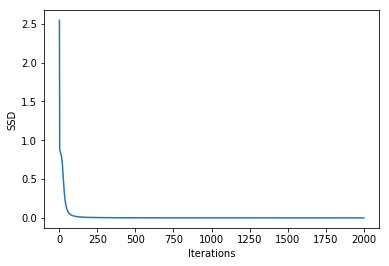

In [13]:
# Task 1

# ---- Parameters ---- #

iterations = 2000
n_unit = 10        # Number of neurons in the Network

# ---- Main ---- #

if __name__ == "__main__":
    
    # Please do notice how a third parameter is added to input, which represents the bias
    Input = np.array([[0,0,0],
                      [0,1,0],
                      [1,0,0],
                      [1,1,1]])

    Target = np.array([[0],[0],[0],[1]])         # Target labels
    model = NeuralNetwork(Input, Target, n_unit) # Creating the network with parameters 
    SSD = []                                     # List to fill error values
    
    # ---- Training sequence ---- #
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))               # Objective(loss) function
    
    
    # ---- Plotting ---- #
    Itr = np.linspace(1,len(SSD),len(SSD))
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    print("The target values are:", Target)
    print("The predicted values are:", model.output)

The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.01356331]
 [0.99109457]
 [0.99150691]
 [0.00480366]]


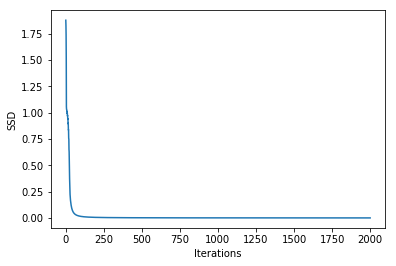

In [14]:
# Task 2

# ---- Parameters ---- #

iterations = 2000
n_unit = 10 # Number of neurons in the Network

# ---- Main ---- #

if __name__ == "__main__":
    
    # Different labels than task 1 since this represents the XOR-problem
    Input = np.array([[0,0,0],
                      [0,1,1],
                      [1,0,1],
                      [1,1,0]])

    Target = np.array([[0],[1],[1],[0]])          # Target labels
    model = NeuralNetwork(Input, Target, n_unit)  # Creating the network with parameters 
    SSD = []                                      # List to fill error values
    
    # ---- Training sequence ---- #
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))                # Objective(loss) function

    # ---- Plotting ---- #
    Itr = np.linspace(1,len(SSD),len(SSD))
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')
    print("The target values are:", Target)
    print("The predicted values are:", model.output)

In [15]:
# Task 3

# MPL with Tensorflow Keras

# ---- Parameters ---- #
Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32") # Input data, notice how this differs from Task 1 & 2
Target = np.array([[0],[1],[1],[0]], "float32")        # Target labels, we're still doing the XOR-problem
n_unit = 10                                            # Number of Neurons


# ---- Model Creation ---- # 
model = Sequential()                                       # Creating an MPL model using class Sequential in TF Keras
model.add(Dense(n_unit, input_dim=2, activation='relu'))   # Creating first layer with activation function 'Relu'
model.add(Dense(1, activation='sigmoid'))                  # Creating a second layer with activation function 'Sigmoid'

# Compiling the layers and setting loss & optimizer functions
model.compile(loss='mean_squared_error',
              optimizer = SGD(lr = 0.1),
              metrics=['binary_accuracy'])

# Executing training with 2000 epochs
model.fit(Input, Target, epochs = 2000, verbose=0)

# Printing results
print("The predicted class labels are:", model.predict(Input))

The predicted class labels are: [[0.11535066]
 [0.9467273 ]
 [0.9513795 ]
 [0.03968719]]


In [16]:
# ---- Generating data for Task 4 & 5 ---- #

# Loading data
def gen_labels(im_name, pat1, pat2):
  #   '''
  # Parameters
  # ----------
  # im_name : Str
  # The image file name.
  # pat1 : Str
  # A string pattern in the filename for 1st class, e.g "Mel"
  # pat2 : Str
  # A string pattern in the filename 2nd class, e.g, "Nev"
  # Returns
  # -------
  # Label : Numpy array
  # Class label of the filename name based on its pattern.
  # '''
    if pat1 in im_name:
        label = np.array([0])
    elif pat2 in im_name:
        label = np.array([1])
    return label

def get_data(data_path, data_list, img_h, img_w):
  # """
  # Parameters
  # ----------
  # train_data_path : Str
  # Path to the data directory
  # train_list : List
  # A list containing the name of the images.
  # img_h : Int
  # image height to be resized to.
  # img_w : Int
  # image width to be resized to.
  # Returns
  # -------
  # img_labels : Nested List
  # A nested list containing the loaded images along with their
  # correcponding labels.
  # """
    img_labels = []
    for item in enumerate(data_list):
        img = imread(os.path.join(data_path, item[1]), as_gray = True) # "as_grey"
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        img_labels.append([np.array(img), gen_labels(item[1], 'Mel', 'Nev')])
        if item[0] % 100 == 0:
              print('Reading: {0}/{1} of train images'.format(item[0], len(data_list)))
    shuffle(img_labels)
    return img_labels

def get_data_arrays(nested_list, img_h, img_w):
  # """
  # Parameters
  # ----------
  # nested_list : nested list
  # nested list of image arrays with corresponding class labels.
  # img_h : Int
  # Image height.
  # img_w : Int
  # Image width.
  # -------
  # img_arrays : Numpy array
  # 4D Array with the size of (n_data,img_h,img_w, 1)
  # label_arrays : Numpy array
  # 1D array with the size (n_data).
  # """

    img_arrays = np.zeros((len(nested_list), img_h, img_w), dtype = np.float32)
    label_arrays = np.zeros((len(nested_list)), dtype = np.int32)

    for ind in range(len(nested_list)):
        img_arrays[ind] = nested_list[ind][0]
        label_arrays[ind] = nested_list[ind][1]

    img_arrays = np.expand_dims(img_arrays, axis =3)
    return img_arrays, label_arrays

def get_train_test_arrays(train_data_path, test_data_path, train_list,
test_list, img_h, img_w):
  # """
  # Get the directory to the train and test sets, the files names and
  # the size of the image and return the image and label arrays for
  # train and test sets.
  # """
    train_data = get_data(train_data_path, train_list, img_h, img_w)
    test_data = get_data(test_data_path, test_list, img_h, img_w)

    train_img, train_label = get_data_arrays(train_data, img_h, img_w)
    test_img, test_label = get_data_arrays(test_data, img_h, img_w)
    del(train_data)
    del(test_data)
    return train_img, test_img, train_label, test_label

img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = '/DL_course_data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)
x_train, x_test, y_train, y_test = get_train_test_arrays(
train_data_path, test_data_path,
train_list, test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


In [3]:
# Constructor for a 4 layer MLP using TF Keras Model class
def model(img_width, img_height, img_ch, base_dense):
    
    # Defining input
    input_size = (img_width, img_height, img_ch)
    inputs_layer = Input(shape=input_size, name='input_layer')
    
    # Creating layers and connecting them. Each layer is used as input to the next. 
    flatten_layer = Flatten()(inputs_layer)
    layer1 = Dense(base_dense, activation='relu')(flatten_layer)
    layer2 = Dense(base_dense//2, activation='relu')(layer1)
    layer3 = Dense(base_dense//4, activation='relu')(layer2)
    
    # Output layer has only one node and sigmoid activation to get a binary classification
    out = Dense(1,activation='sigmoid')(layer3)
    
    # Creating a model with above parameters using Model in TF Keras
    clf = Model(inputs=inputs_layer, outputs=out)
    
    # Prints a summary of then network
    clf.summary()
    
    return clf

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 128, 128, 1)]     0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,235,777
Trainable params: 4,235,777
Non-trainable params: 0
_________________________________________________

Epoch 44/150
1000/1000 [==============================] - 0s 404us/sample - loss: 0.6548 - binary_accuracy: 0.6810 - val_loss: 0.6553 - val_binary_accuracy: 0.6900
Epoch 45/150
1000/1000 [==============================] - 0s 400us/sample - loss: 0.6539 - binary_accuracy: 0.6960 - val_loss: 0.6540 - val_binary_accuracy: 0.7000
Epoch 46/150
1000/1000 [==============================] - 0s 398us/sample - loss: 0.6540 - binary_accuracy: 0.6960 - val_loss: 0.6536 - val_binary_accuracy: 0.6850
Epoch 47/150
1000/1000 [==============================] - 0s 397us/sample - loss: 0.6531 - binary_accuracy: 0.6850 - val_loss: 0.6527 - val_binary_accuracy: 0.7050
Epoch 48/150
1000/1000 [==============================] - 0s 398us/sample - loss: 0.6522 - binary_accuracy: 0.6880 - val_loss: 0.6521 - val_binary_accuracy: 0.7250
Epoch 49/150
1000/1000 [==============================] - 0s 394us/sample - loss: 0.6521 - binary_accuracy: 0.6750 - val_loss: 0.6520 - val_binary_accuracy: 0.6950
Epoch 50/150
100

Epoch 94/150
1000/1000 [==============================] - 0s 405us/sample - loss: 0.6330 - binary_accuracy: 0.6950 - val_loss: 0.6366 - val_binary_accuracy: 0.7150
Epoch 95/150
1000/1000 [==============================] - 0s 396us/sample - loss: 0.6331 - binary_accuracy: 0.7020 - val_loss: 0.6365 - val_binary_accuracy: 0.7100
Epoch 96/150
1000/1000 [==============================] - 0s 397us/sample - loss: 0.6322 - binary_accuracy: 0.7090 - val_loss: 0.6373 - val_binary_accuracy: 0.6700
Epoch 97/150
1000/1000 [==============================] - 0s 397us/sample - loss: 0.6313 - binary_accuracy: 0.6920 - val_loss: 0.6359 - val_binary_accuracy: 0.7100
Epoch 98/150
1000/1000 [==============================] - 0s 399us/sample - loss: 0.6313 - binary_accuracy: 0.7020 - val_loss: 0.6359 - val_binary_accuracy: 0.7050
Epoch 99/150
1000/1000 [==============================] - 0s 399us/sample - loss: 0.6315 - binary_accuracy: 0.6990 - val_loss: 0.6355 - val_binary_accuracy: 0.7150
Epoch 100/150
10

Epoch 144/150
1000/1000 [==============================] - 0s 394us/sample - loss: 0.6152 - binary_accuracy: 0.7090 - val_loss: 0.6250 - val_binary_accuracy: 0.7050
Epoch 145/150
1000/1000 [==============================] - 0s 397us/sample - loss: 0.6150 - binary_accuracy: 0.6960 - val_loss: 0.6249 - val_binary_accuracy: 0.7000
Epoch 146/150
1000/1000 [==============================] - 0s 391us/sample - loss: 0.6144 - binary_accuracy: 0.7160 - val_loss: 0.6248 - val_binary_accuracy: 0.7150
Epoch 147/150
1000/1000 [==============================] - 0s 404us/sample - loss: 0.6152 - binary_accuracy: 0.7140 - val_loss: 0.6245 - val_binary_accuracy: 0.7150
Epoch 148/150
1000/1000 [==============================] - 0s 403us/sample - loss: 0.6152 - binary_accuracy: 0.7000 - val_loss: 0.6242 - val_binary_accuracy: 0.7200
Epoch 149/150
1000/1000 [==============================] - 0s 403us/sample - loss: 0.6144 - binary_accuracy: 0.7080 - val_loss: 0.6244 - val_binary_accuracy: 0.7050
Epoch 150/

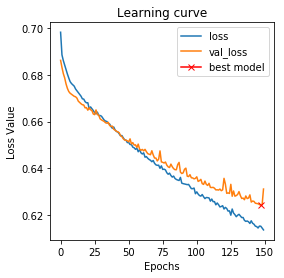

In [5]:
# Task 4

# ---- Parameters ---- #
img_w = 128      # Witdh of input images
img_h = 128      # Height of input images 
img_ch = 1       # Number of channels
base_dense = 256  # Number of neurons in first layer

# Creating a model with above parameters
clf = model(img_w, img_h, img_ch, base_dense)

# Compiling the layers and setting loss & optimizer functions
clf.compile(loss='binary_crossentropy',
            optimizer = SGD(lr = 0.0001),
            metrics=['binary_accuracy'])

# Trains the model for 150 epochs with 15 images in each batch
clf_hist = clf.fit(x_train, y_train,
          batch_size = 16, epochs = 150,          
          validation_data = (x_test,y_test))   # Validation data is training data shuffled

# ---- Plotting ---- #
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
np.min(clf_hist.history["val_loss"]),
marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();

In [7]:
# Constructor for a 4 layer CNN using TF Keras Sequential class
def model2(img_ch, img_width, img_height,base):
       
    # Setting shape of input    
    input_shape = (img_width, img_height, img_ch)
    
    # Creating the model
    model = Sequential()
    
    # --- Creating the first two convolutional layers --- #
    
    # First convolutional layer
    model.add(Conv2D(base, kernel_size = (3, 3), activation='relu',
    strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second convolutional layer
    model.add(Conv2D(base*2, kernel_size = (3, 3), activation='relu',
    strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Creating the last two fully connected layers
    model.add(Flatten())
    model.add(Dense(base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
                     
    return model

Train on 1000 samples, validate on 200 samples
Epoch 1/200
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.7012 - binary_accuracy: 0.5150 - val_loss: 0.6906 - val_binary_accuracy: 0.4950
Epoch 2/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6886 - binary_accuracy: 0.5550 - val_loss: 0.6846 - val_binary_accuracy: 0.5000
Epoch 3/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6824 - binary_accuracy: 0.5720 - val_loss: 0.6719 - val_binary_accuracy: 0.7200
Epoch 4/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6578 - binary_accuracy: 0.6350 - val_loss: 0.6516 - val_binary_accuracy: 0.7000
Epoch 5/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6471 - binary_accuracy: 0.6190 - val_loss: 0.6458 - val_binary_accuracy: 0.6800
Epoch 6/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6250 - binary_accuracy: 0.6620 - val_loss: 0.6299 - val_binary_accu

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1907 - binary_accuracy: 0.9380 - val_loss: 0.5804 - val_binary_accuracy: 0.7900
Epoch 52/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1950 - binary_accuracy: 0.9230 - val_loss: 0.5744 - val_binary_accuracy: 0.7850
Epoch 53/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1986 - binary_accuracy: 0.9220 - val_loss: 0.5754 - val_binary_accuracy: 0.8100
Epoch 54/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1800 - binary_accuracy: 0.9370 - val_loss: 0.6056 - val_binary_accuracy: 0.7900
Epoch 55/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1731 - binary_accuracy: 0.9450 - val_loss: 0.5997 - val_binary_accuracy: 0.7900
Epoch 56/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.1727 - binary_accuracy: 0.9380 - val_loss: 0.5914 - val_binary_accuracy: 0.8050
Epoch 57/200
1000/1000 [=================

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0199 - binary_accuracy: 0.9970 - val_loss: 0.9591 - val_binary_accuracy: 0.7850
Epoch 102/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0185 - binary_accuracy: 0.9990 - val_loss: 0.9938 - val_binary_accuracy: 0.7600
Epoch 103/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0191 - binary_accuracy: 0.9990 - val_loss: 0.9608 - val_binary_accuracy: 0.7800
Epoch 104/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0173 - binary_accuracy: 1.0000 - val_loss: 0.9654 - val_binary_accuracy: 0.7850
Epoch 105/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0191 - binary_accuracy: 0.9990 - val_loss: 1.0310 - val_binary_accuracy: 0.8000
Epoch 106/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0148 - binary_accuracy: 1.0000 - val_loss: 0.9787 - val_binary_accuracy: 0.7750
Epoch 107/200
1000/1000 [===========

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 1.3133 - val_binary_accuracy: 0.7750
Epoch 152/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 1.3453 - val_binary_accuracy: 0.7800
Epoch 153/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0013 - binary_accuracy: 1.0000 - val_loss: 1.3485 - val_binary_accuracy: 0.7800
Epoch 154/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0012 - binary_accuracy: 1.0000 - val_loss: 1.3514 - val_binary_accuracy: 0.7650
Epoch 155/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 1.3716 - val_binary_accuracy: 0.7750
Epoch 156/200
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 1.3762 - val_binary_accuracy: 0.7650
Epoch 157/200
1000/1000 [===========

1000/1000 [==============================] - 1s 1ms/sample - loss: 1.4990e-04 - binary_accuracy: 1.0000 - val_loss: 1.7840 - val_binary_accuracy: 0.7650
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            multiple                  320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_5 (Conv2D)            multiple                  18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             mult

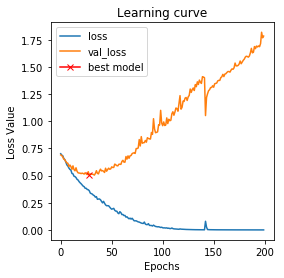

In [10]:
# Task 5

# ---- Parameters ---- #
img_w = 128      # Witdh of input images
img_h = 128      # Height of input images 
img_ch = 1       # Number of channels
base = 32        # Number of neurons in first layer

# Creating a CNN Network
clf = model2(img_ch, img_w, img_h, base)


# Compiling the layers and setting loss & optimizer function
clf.compile(loss='binary_crossentropy',
            optimizer = Adam(lr = 0.0001),
            metrics=['binary_accuracy'])

# Trains the model for 200 epochs with 8 images in each batch
clf_hist = clf.fit(x_train, y_train,
          batch_size=8, epochs=200,     
          validation_data=(x_test,y_test)) # Validation data is training data shuffled

# Prints a summary of the network
clf.summary()
        
# ---- Plotting ---- #
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
np.min(clf_hist.history["val_loss"]),
marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend();